In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=ce7b5f08b744319f7db1f3550b57706a91956e5fc0392162076e7935698c30a2
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pyspark.sql.functions as F
from pyspark.sql.types import IntegerType

# Inisialisasi sesi Spark
spark = SparkSession.builder.appName("KrisisEkonomiAfrika").getOrCreate()

# Mengubah peringatan menjadi tidak tercetak
spark.sparkContext.setLogLevel("ERROR")

# Mengatur opsi tampilan
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

# Membaca file CSV
df = spark.read.format("csv").option("header", True).load("/content/drive/MyDrive/BIGDATA/african_crises.csv")

#membaca data
df.printSchema()

root
 |-- case: string (nullable = true)
 |-- cc3: string (nullable = true)
 |-- country: string (nullable = true)
 |-- year: string (nullable = true)
 |-- systemic_crisis: string (nullable = true)
 |-- exch_usd: string (nullable = true)
 |-- domestic_debt_in_default: string (nullable = true)
 |-- sovereign_external_debt_default: string (nullable = true)
 |-- gdp_weighted_default: string (nullable = true)
 |-- inflation_annual_cpi: string (nullable = true)
 |-- independence: string (nullable = true)
 |-- currency_crises: string (nullable = true)
 |-- inflation_crises: string (nullable = true)
 |-- banking_crisis: string (nullable = true)



In [ ]:
# Menampilkan 10 baris pertama
df.show(10)

+----+---+-------+----+---------------+--------+------------------------+-------------------------------+--------------------+--------------------+------------+---------------+----------------+--------------+
|case|cc3|country|year|systemic_crisis|exch_usd|domestic_debt_in_default|sovereign_external_debt_default|gdp_weighted_default|inflation_annual_cpi|independence|currency_crises|inflation_crises|banking_crisis|
+----+---+-------+----+---------------+--------+------------------------+-------------------------------+--------------------+--------------------+------------+---------------+----------------+--------------+
|   1|DZA|Algeria|1870|              1|0.052264|                       0|                              0|                   0|         3.441455696|           0|              0|               0|        crisis|
|   1|DZA|Algeria|1871|              0|0.052798|                       0|                              0|                   0|         14.14913958|           0|    

In [ ]:
#menampilkan kolom tertentu (negara merdeka)
from pyspark.sql.functions import col

merdeka = df.filter(col('independence') == 1).select('country', 'year', 'banking_crisis')

merdeka.show(20)


+-------+----+--------------+
|country|year|banking_crisis|
+-------+----+--------------+
|Algeria|1968|     no_crisis|
|Algeria|1969|     no_crisis|
|Algeria|1970|     no_crisis|
|Algeria|1971|     no_crisis|
|Algeria|1972|     no_crisis|
|Algeria|1973|     no_crisis|
|Algeria|1974|     no_crisis|
|Algeria|1975|     no_crisis|
|Algeria|1976|     no_crisis|
|Algeria|1977|     no_crisis|
|Algeria|1978|     no_crisis|
|Algeria|1979|     no_crisis|
|Algeria|1980|     no_crisis|
|Algeria|1981|     no_crisis|
|Algeria|1982|     no_crisis|
|Algeria|1983|     no_crisis|
|Algeria|1984|     no_crisis|
|Algeria|1985|     no_crisis|
|Algeria|1986|     no_crisis|
|Algeria|1987|     no_crisis|
+-------+----+--------------+
only showing top 20 rows



In [ ]:
# Melihat apakah ada data tiap tahun
from pyspark.sql.functions import count
from pyspark.sql import functions as F

# mengelompokkan menurut negara dan pivot pada tahun
cross_tab = df.groupBy('country').pivot('year').agg(count('*')).fillna(0)

# Menampilkan tabulasi silang
cross_tab.show()

+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|             country|1860|1861|1862|1863|1864|1865|1866|1867|1868|1869|1870|1871|1872|1873|1874|1875|1876|1877|1878|1879|1880|1881|1882|1883|1884|1885|1886|1887|1888|1889|1890|1891|1892|1893|1894|1895|

In [ ]:
# Berapa kali negara-negara tersebut mengalami krisis mata uang?
from pyspark.sql import functions as F

# mengelompokkan berdasarkan negara dan hitung jumlah krisis mata uang
currency_crises = df.groupBy('country').agg(F.sum('currency_crises').alias('total_currency_crises')).sort('total_currency_crises', ascending=False)

currency_crises.show()


+--------------------+---------------------+
|             country|total_currency_crises|
+--------------------+---------------------+
|              Angola|                 22.0|
|            Zimbabwe|                 21.0|
|              Zambia|                 19.0|
|        South Africa|                 16.0|
|             Nigeria|                 10.0|
|             Tunisia|                 10.0|
|             Algeria|                  9.0|
|               Kenya|                  9.0|
|             Morocco|                  8.0|
|               Egypt|                  8.0|
|           Mauritius|                  5.0|
|Central African R...|                  2.0|
|         Ivory Coast|                  1.0|
+--------------------+---------------------+



In [ ]:
# Berapa kali negara-negara tersebut mengalami inflasi
from pyspark.sql import functions as F

# mengelompokkan berdasarkan negara dan hitung jumlah krisis inflasi
inflation_crises = df.groupBy('country').agg(F.sum('inflation_crises').alias('total_inflation_crises')).sort('total_inflation_crises', ascending=False)

inflation_crises.show()


+--------------------+----------------------+
|             country|total_inflation_crises|
+--------------------+----------------------+
|              Angola|                  26.0|
|              Zambia|                  20.0|
|            Zimbabwe|                  19.0|
|             Algeria|                  14.0|
|             Nigeria|                  12.0|
|               Egypt|                  11.0|
|             Morocco|                  10.0|
|             Tunisia|                   8.0|
|           Mauritius|                   6.0|
|         Ivory Coast|                   4.0|
|               Kenya|                   4.0|
|Central African R...|                   2.0|
|        South Africa|                   1.0|
+--------------------+----------------------+



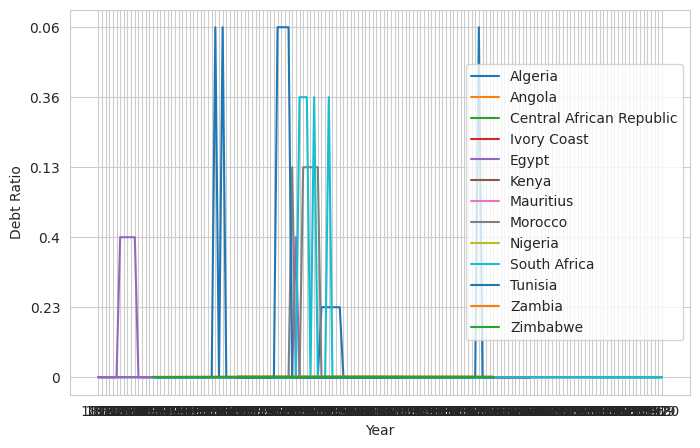

In [ ]:
#menampilkan tingkat IHK (rasio hutang tiap negara)
# Convert the PySpark DataFrame to a Pandas DataFrame
df_pandas = df.select('year', 'gdp_weighted_default', 'country').toPandas()

# Memplot diagram garis menggunakan Matplotlib dan Panda
plt.figure(figsize=(8, 5))
for country in df_pandas['country'].unique():
    data = df_pandas[df_pandas['country'] == country]
    plt.plot(data['year'], data['gdp_weighted_default'], label=country)

plt.xlabel('Year')
plt.ylabel('Debt Ratio')
plt.legend()
plt.show()



In [ ]:
!pip install plotly


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px

#menampilkan grafik nilai tukar ke USD tiap negara
# Convert the DataFrame to Pandas for visualization
pandas_df = df.toPandas()

# Memplot nilai tukar menggunakan Plotly
fig = px.line(pandas_df, x='year', y='exch_usd', color='country')

# menampilkan ploty
fig.show()

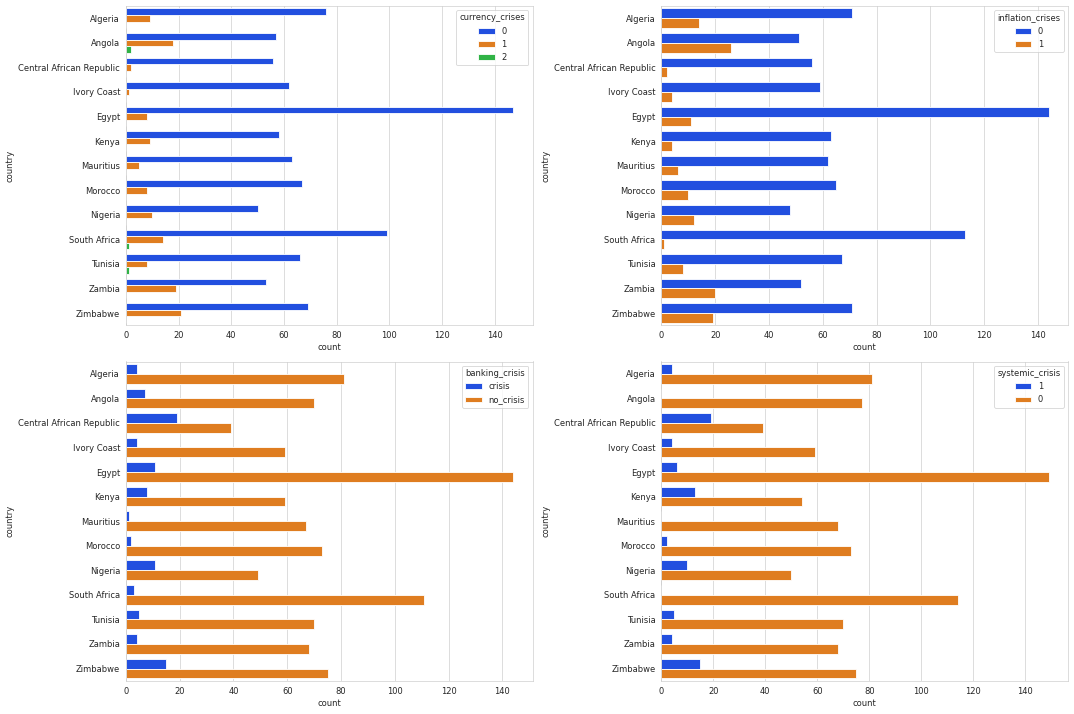

In [ ]:
#menampilkan Visualisasi berbagai jenis krisis
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat SparkSession
spark = SparkSession.builder.appName("CrisisVisualization").getOrCreate()

# Menentukan jalur ke file data
filePath = "/content/drive/MyDrive/BIGDATA/african_crises.csv"

# Muat data ke dalam DataFrame
df = spark.read.format("csv").option("header", "true").load(filePath)

# Menentukan kolom untuk berbagai jenis krisis
cols = ['currency_crises', 'inflation_crises', 'banking_crisis', 'systemic_crisis']

# Merencanakan jumlah krisis untuk setiap negara
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(18, 12), dpi=60)
axes = axes.flatten()

for i, ax in zip(cols, axes):
    sns.countplot(y='country', ax=ax, data=df.toPandas(), hue=i, palette='bright')

plt.tight_layout()
plt.show()
